In [2]:
import tensorflow as tf
import json
from keras.models import load_model
from keras.models import model_from_json
from keras.preprocessing import image
import os
import numpy as np
import matplotlib.pyplot as plt
import PIL as Image

/home/hevish/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/hevish/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/hevish/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/hevish/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework

# Load and Compile Model from Classifier Training

In [37]:
# Load first model (weights and model params are in the same .h5 file)
#loaded_model = tf.keras.models.load_model('classifier_model_new12000.h5') 
#loaded_model.layers[0].input_shape #(None, 160, 160, 3)


#loaded_model.compile(optimizer='adam',
#              loss='sparse_categorical_crossentropy',
#              metrics=['accuracy'])

In [38]:
# Load a second model (weights and model params saved separately)

#Uncomment below to use
model_file = 'model.json' # Json with model parameters
with open(model_file, 'r') as jfile:
    loaded_model = model_from_json(json.loads(jfile.read()))

loaded_model.layers[0].input_shape
loaded_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
loaded_model.load_weights('model.h5')# Weights from .h5 

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Load test images #batch_holder holds the testing batch

In [39]:
batch_holder = np.zeros((21, 32,32, 3))
img_dir='image_t/valid_detections/'
for i,img in enumerate(os.listdir(img_dir)):
    img = image.load_img(os.path.join(img_dir,img), target_size=(32,32))
    batch_holder[i, :] = img

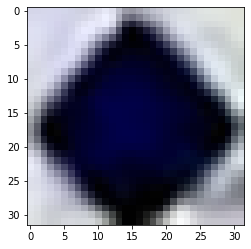

In [40]:
plt.imshow((batch_holder[1] * 255).astype(np.uint8)) #to check

### Class LABELS

In [41]:
LABELS = {0:   "Speed limit (20kmh)",
        1:  "Speed limit (30kmh)",
        2:  "Speed limit (50kmh)",
        3:  "Speed limit (60kmh)",
        4:  "Speed limit (70kmh)",
        5:  "Speed limit (80kmh)",
        6:  "End of speed limit (80kmh)",
        7:  "Speed limit (100kmh)",
        8:  "Speed limit (120kmh)",
        9:  "No passing",
        10: "No passing for vechiles over 3.5 metric tons",
        11: "Right-of-way at the next intersection",
        12: "Priority road",
        13: "Yield",
        14: "Stop",
        15: "No vechiles",
        16: "Vechiles over 3.5 metric tons prohibited",
        17: "No entry",
        18: "General caution",
        19: "Dangerous curve to the left",
        20: "Dangerous curve to the right",
        21: "Double curve",
        22: "Bumpy road",
        23: "Slippery road",
        24: "Road narrows on the right",
        25: "Road work",
        26: "Traffic signals",
        27: "Pedestrians",
        28: "Children crossing",
        29: "Bicycles crossing",
        30: "Beware of ice/snow",
        31: "Wild animals crossing",
        32: "End of all speed and passing limits",
        33: "Turn right ahead",
        34: "Turn left ahead",
        35: "Ahead only",
        36: "Go straight or right",
        37: "Go straight or left",
        38: "Keep right",
        39: "Keep left",
        40: "Roundabout mandatory",
        41: "End of no passing",
        42: "End of no passing by vechiles over 3.5 metric tons"}

### PREDICT PROBABILITIES

In [42]:
predictions = loaded_model.predict_proba(batch_holder)
predictions[1]

array([1.30351009e-05, 5.18836677e-01, 4.80881855e-02, 1.20763885e-04,
       9.13794991e-03, 1.03880302e-03, 1.44927089e-05, 6.85794791e-03,
       2.14137090e-05, 1.55071000e-04, 3.28904025e-05, 1.41003358e-04,
       1.08216889e-01, 1.07907407e-01, 1.21842982e-04, 2.22552512e-02,
       6.63210471e-07, 2.51938968e-06, 8.94226978e-05, 1.33298522e-06,
       2.18637695e-07, 1.31011836e-06, 1.89667091e-08, 7.08097714e-09,
       2.42900744e-09, 1.78177361e-05, 2.10610946e-04, 1.05644290e-06,
       1.49038406e-05, 1.08530041e-09, 6.78677793e-07, 1.72764851e-06,
       2.49830860e-04, 3.63088417e-04, 1.37189807e-06, 2.26409626e-04,
       3.03069100e-05, 1.23472197e-03, 1.68842569e-01, 8.32562742e-04,
       4.89290431e-03, 2.01806888e-05, 4.24775635e-06], dtype=float32)

### PREDICT CORRESPONDING CLASSES

In [43]:
result=loaded_model.predict_classes(batch_holder)

### DISPLAY RESULTS

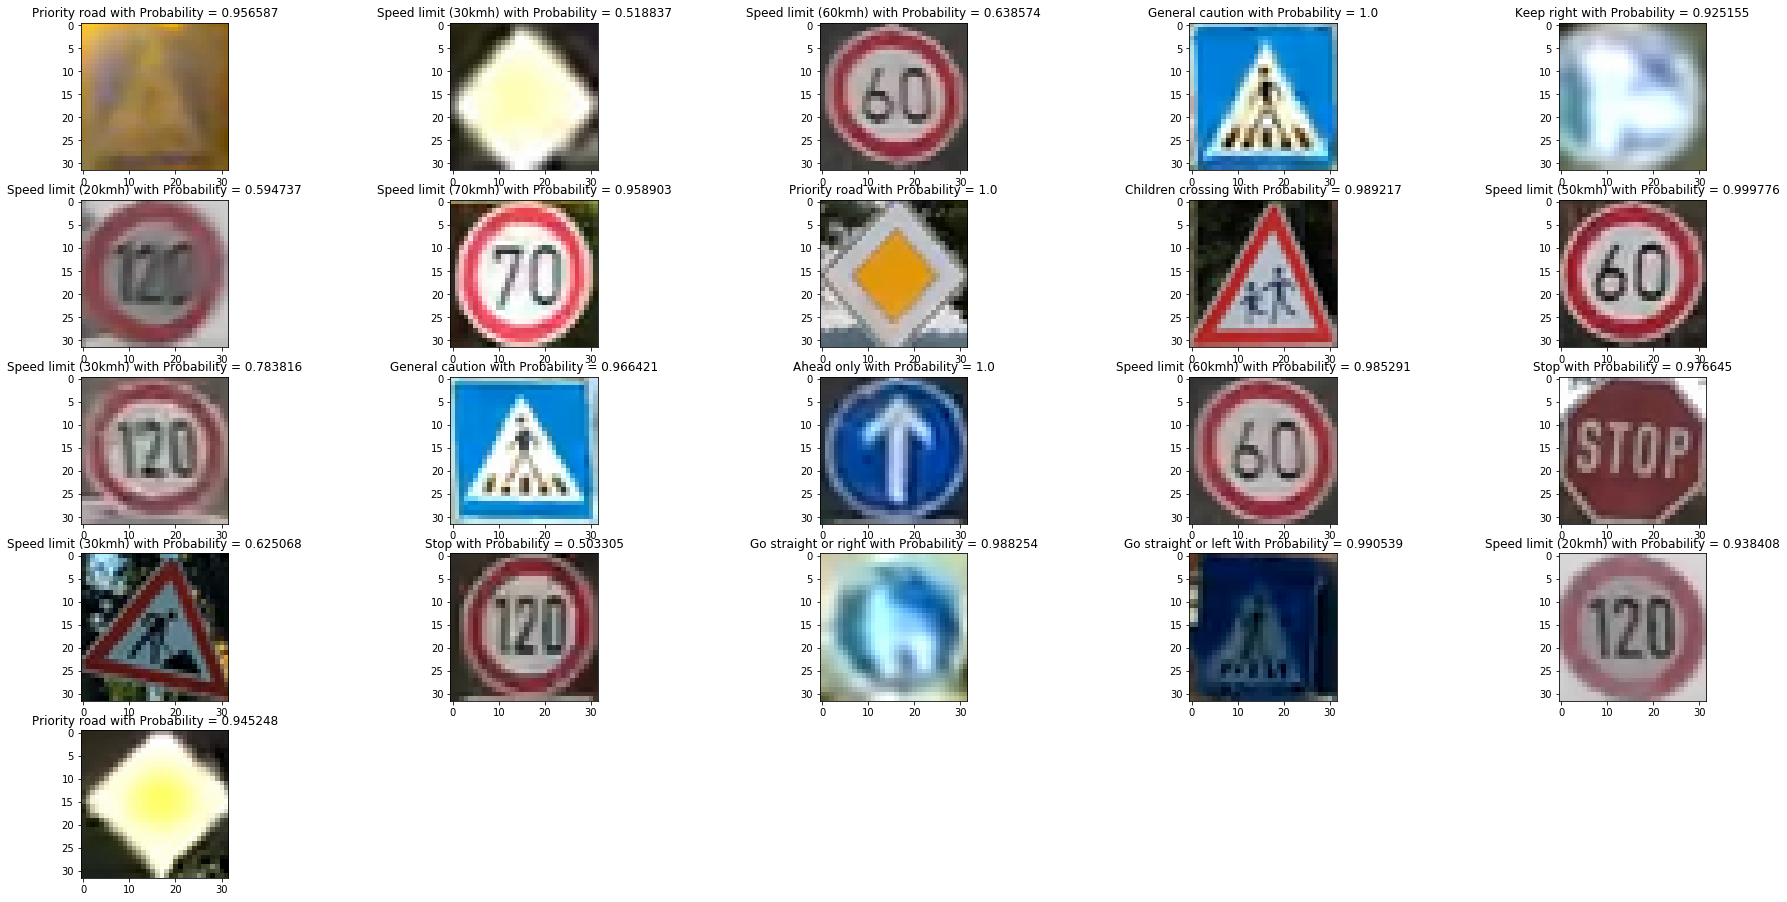

In [44]:

fig = plt.figure(figsize=(32,32))
for i,img in enumerate(batch_holder):
    fig.add_subplot(10,5, i+1)
    prob = np.max(predictions[i])
    plt.title(LABELS[result[i]] + " with Probability = " + str(round(prob,6)))
    plt.imshow(img/256.)
   

In [16]:
# Expanding probability np array for debugging 

In [17]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
predictions

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000

# DEBUGGING

In [22]:
# Testing on similar looking images (road_sign 60kmph)
our_60 = "/home/hevish/Desktop/Classifier/Traffic-Sign-Classifier-master/images/testfolder/img_23_box_5 resized.png"
their_60 = "/home/hevish/Desktop/Classifier/Traffic-Sign-Classifier-master/images/testfolder/5010_00032_00013 resized.png"



In [20]:
from PIL import Image
import os, sys

path = "/home/hevish/Desktop/Classifier/Traffic-Sign-Classifier-master/images/testfolder/"
dirs = os.listdir(path)

def resize():
    for item in dirs:
        if os.path.isfile(path+item):
            im = Image.open(path+item)
            f, e = os.path.splitext(path+item)
            imResize = im.resize((32,32), Image.ANTIALIAS)
            imResize.save(f + ' resized.png', 'PNG', quality=90)

resize()

In [23]:
import numpy as np
import PIL
our_img_data = PIL.Image.open(our_60)
our_img_arr = np.array(our_img_data) 
th_img_data = PIL.Image.open(their_60)
th_img_arr = np.array(th_img_data) 
print(our_img_arr.shape)


(32, 32, 4)


In [24]:
our_img_arr

array([[[ 77,  57,  52, 255],
        [ 74,  57,  49, 255],
        [ 70,  54,  46, 255],
        [ 63,  48,  41, 255],
        [ 61,  45,  38, 255],
        [ 63,  51,  44, 255],
        [ 62,  53,  43, 255],
        [ 58,  51,  40, 255],
        [ 73,  64,  53, 255],
        [ 71,  60,  50, 255],
        [ 58,  42,  34, 255],
        [ 74,  54,  47, 255],
        [ 83,  61,  54, 255],
        [108,  82,  77, 255],
        [153, 126, 121, 255],
        [184, 157, 152, 255],
        [178, 151, 145, 255],
        [137, 111, 104, 255],
        [105,  82,  74, 255],
        [ 83,  65,  55, 255],
        [ 57,  42,  32, 255],
        [ 52,  40,  30, 255],
        [ 61,  51,  41, 255],
        [ 69,  60,  51, 255],
        [ 72,  66,  56, 255],
        [ 67,  63,  51, 255],
        [ 63,  62,  49, 255],
        [ 63,  61,  49, 255],
        [ 63,  60,  48, 255],
        [ 63,  59,  46, 255],
        [ 63,  58,  46, 255],
        [ 63,  58,  46, 255]],

       [[ 76,  59,  52, 255],
        

In [25]:
x = our_img_arr[:,:,0:3]

In [26]:
x

array([[[ 77,  57,  52],
        [ 74,  57,  49],
        [ 70,  54,  46],
        [ 63,  48,  41],
        [ 61,  45,  38],
        [ 63,  51,  44],
        [ 62,  53,  43],
        [ 58,  51,  40],
        [ 73,  64,  53],
        [ 71,  60,  50],
        [ 58,  42,  34],
        [ 74,  54,  47],
        [ 83,  61,  54],
        [108,  82,  77],
        [153, 126, 121],
        [184, 157, 152],
        [178, 151, 145],
        [137, 111, 104],
        [105,  82,  74],
        [ 83,  65,  55],
        [ 57,  42,  32],
        [ 52,  40,  30],
        [ 61,  51,  41],
        [ 69,  60,  51],
        [ 72,  66,  56],
        [ 67,  63,  51],
        [ 63,  62,  49],
        [ 63,  61,  49],
        [ 63,  60,  48],
        [ 63,  59,  46],
        [ 63,  58,  46],
        [ 63,  58,  46]],

       [[ 76,  59,  52],
        [ 79,  64,  57],
        [ 84,  67,  59],
        [ 73,  53,  45],
        [ 69,  48,  41],
        [ 76,  58,  50],
        [ 66,  51,  43],
        [ 66,  52,  43]

In [27]:
th_img_arr

array([[[ 42,  43,  30],
        [ 56,  52,  53],
        [ 72,  71,  72],
        [ 69,  71,  62],
        [107, 101, 100],
        [124, 115, 113],
        [ 75,  85,  65],
        [ 86,  97, 100],
        [143, 136, 175],
        [189, 177, 201],
        [227, 193, 216],
        [100,  65,  70],
        [ 28,  37,  36],
        [ 38,  37,  38],
        [ 65,  48,  40],
        [152, 182, 185],
        [255, 255, 253],
        [232, 198, 176],
        [223, 204, 209],
        [209, 154, 126],
        [ 75,  30,  21],
        [ 23,  27,  26],
        [ 35,  33,  38],
        [ 31,  30,  31],
        [ 29,  29,  29],
        [ 30,  29,  31],
        [ 24,  25,  24],
        [ 44,  47, 107],
        [204, 207, 234],
        [255, 255, 254],
        [252, 252, 254],
        [255, 255, 255]],

       [[ 56,  52,  48],
        [ 64,  55,  50],
        [ 46,  56,  50],
        [ 57,  56,  47],
        [ 57,  56,  76],
        [149, 134, 159],
        [172, 173, 158],
        [140, 139, 105]

In [28]:
print(our_img_arr)

[[[ 77  57  52 255]
  [ 74  57  49 255]
  [ 70  54  46 255]
  [ 63  48  41 255]
  [ 61  45  38 255]
  [ 63  51  44 255]
  [ 62  53  43 255]
  [ 58  51  40 255]
  [ 73  64  53 255]
  [ 71  60  50 255]
  [ 58  42  34 255]
  [ 74  54  47 255]
  [ 83  61  54 255]
  [108  82  77 255]
  [153 126 121 255]
  [184 157 152 255]
  [178 151 145 255]
  [137 111 104 255]
  [105  82  74 255]
  [ 83  65  55 255]
  [ 57  42  32 255]
  [ 52  40  30 255]
  [ 61  51  41 255]
  [ 69  60  51 255]
  [ 72  66  56 255]
  [ 67  63  51 255]
  [ 63  62  49 255]
  [ 63  61  49 255]
  [ 63  60  48 255]
  [ 63  59  46 255]
  [ 63  58  46 255]
  [ 63  58  46 255]]

 [[ 76  59  52 255]
  [ 79  64  57 255]
  [ 84  67  59 255]
  [ 73  53  45 255]
  [ 69  48  41 255]
  [ 76  58  50 255]
  [ 66  51  43 255]
  [ 66  52  43 255]
  [ 91  72  64 255]
  [ 92  66  61 255]
  [139 102  99 255]
  [182 133 134 255]
  [205 146 150 255]
  [195 129 135 255]
  [195 127 133 255]
  [191 120 126 255]
  [160  89  94 255]
  [195 123 128 255

In [29]:
# The difference between the 2 array elements

In [30]:
np.subtract(th_img_arr, x)

array([[[221, 242, 234],
        [238, 251,   4],
        [  2,  17,  26],
        [  6,  23,  21],
        [ 46,  56,  62],
        [ 61,  64,  69],
        [ 13,  32,  22],
        [ 28,  46,  60],
        [ 70,  72, 122],
        [118, 117, 151],
        [169, 151, 182],
        [ 26,  11,  23],
        [201, 232, 238],
        [186, 211, 217],
        [168, 178, 175],
        [224,  25,  33],
        [ 77, 104, 108],
        [ 95,  87,  72],
        [118, 122, 135],
        [126,  89,  71],
        [ 18, 244, 245],
        [227, 243, 252],
        [230, 238, 253],
        [218, 226, 236],
        [213, 219, 229],
        [219, 222, 236],
        [217, 219, 231],
        [237, 242,  58],
        [141, 147, 186],
        [192, 196, 208],
        [189, 194, 208],
        [192, 197, 209]],

       [[236, 249, 252],
        [241, 247, 249],
        [218, 245, 247],
        [240,   3,   2],
        [244,   8,  35],
        [ 73,  76, 109],
        [106, 122, 115],
        [ 74,  87,  62]